In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd

c_blue1 = '#5c509d'
c_green1 = '#7dc0a7'
# c_green2 = '#39d05c'
c_green3 = '#519e5c'
c_green4 = '#396f42'
c_green5 = '#417f4a'
c_violet1 = '#301466'
c_violet2 = '#b295f6'
c_gray1 = '#444444'
c_gray2 = '#888888'
c_orange1 = '#ECA72C'
c_red1 = '#ed2d2d'
c_red2 = '#810b0b'
c_red3 = '#b51010'
c_red4 = '#bb2525'
c_blue2 = '#4039da'
c_blue3 = '#1a1574'
c_blue4 = '#251ea3'
c_blue5 = '#3632ab'
c_pink1 = '#f69595'

llama2_str = 'llama2'
llama3_str = 'llama3'
gpt_str = 'gpt35t'

color_by_model = {llama2_str: c_blue1, llama3_str: c_green1, gpt_str: c_orange1}
marker_by_model = {llama2_str: 'o', llama3_str: 's', gpt_str: '^'}
label_by_model = {llama2_str: 'Llama2', llama3_str: 'Llama3', gpt_str: 'GPT3.5t'}
offset_by_model = {llama2_str: -10, llama3_str: 0, gpt_str: 10}

base_dir = Path('relevant_runs_copies') / 'main_runs_copies'
rebuttal_dir = base_dir / 'rebuttal_plots'
quests_dirname = '{model_name}_v10_questions'
initial_quests_dir = base_dir / 'llama2_v00_questions'
urndx_dirname = '{model_name}_URNDx_ws10'
ws100_dirname = '{model_name}_AD_ws100'
temperature_dirname = '{model_name}_temperature'

checkers_names = ["time", "rule", "aggregation"]
custom_order = ['rules', 'time', 'state']
comprehension_questions_labels = ['min_max', 'actions', 'payoff', 'round', 'action$_i$', 'points$_i$', '#actions', '#points']
sfem_strategies_labels = ['AD', 'RND', 'AC', 'TFT', 'STFT', 'GRIM', 'WSLS']



IndexError: GridSpec slice would result in no space allocated for subplot

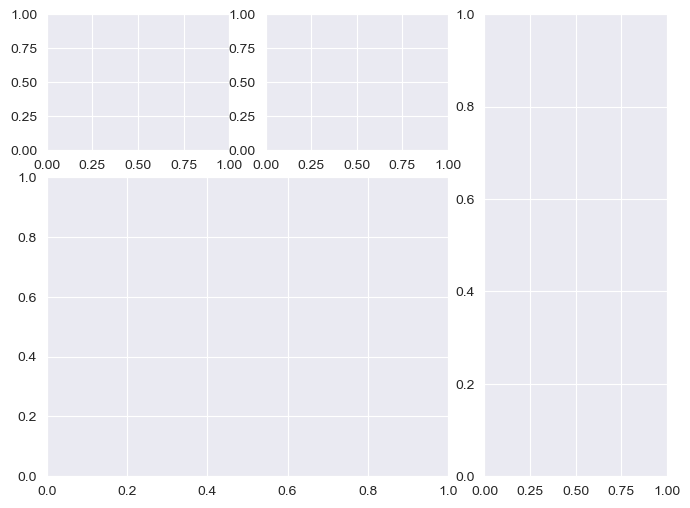

In [9]:
fig = plt.figure(figsize=(8, 6))

# Define the grid for the plot
# A1a is the top left quadrant, A1b is the top middle-left
# A2 takes the entire bottom left column
# B and C are full plots in the second and third columns

# A1a - First column, first row (split into two vertically)
axA1a = plt.subplot2grid((3, 3), (0, 0))

# A1b - First column, first row, second half of the vertical split
axA1b = plt.subplot2grid((3, 3), (0, 1))

# A2 - First column, second row (spans both columns vertically)
axA2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)

# B - Second column
axB = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

# C - Third column
axC = plt.subplot2grid((3, 3), (1, 3), rowspan=3)

# Example data
axA1a.plot([1, 2, 3], [1, 4, 9])
axA1a.set_title("A1a")

axA1b.plot([1, 2, 3], [9, 4, 1])
axA1b.set_title("A1b")

axA2.plot([1, 2, 3], [3, 2, 5])
axA2.set_title("A2")

axB.plot([1, 2, 3], [2, 4, 6])
axB.set_title("B")

axC.plot([1, 2, 3], [6, 4, 2])
axC.set_title("C")

# Adjust layout to fit
plt.tight_layout()
plt.show()


In [ ]:
fig, axs = plt.subplots(1,2,figsize=(7,4))
# fig, ax = plt.subplots(1,1,figsize=(5,4))
alpha=1.0

wdw100_df = pd.read_csv(base_dir / ws100_dirname.format(model_name=llama2_str) / "average_cooperation_per_round.csv")
wdw10_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama2_str) / 'URND00' / "average_cooperation_per_round.csv")
wdw_size_df = pd.read_csv(base_dir / ws100_dirname.format(model_name=llama2_str) / "steady_state_cooperation_per_window_sizes.csv")

ax = axs[0]

ax.plot(wdw10_df['iteration'], wdw10_df[f'mean'], '-', markersize=5,
            c=color_by_model[llama2_str], zorder=2, alpha=alpha, label="ws 10")
ax.fill_between(wdw10_df['iteration'], wdw10_df[f'ci_lb'], wdw10_df[f'ci_ub'], 
                color=color_by_model[llama2_str], edgecolor="none", alpha=0.5, zorder=1)

ax.plot(wdw100_df['iteration'], wdw100_df[f'mean'], '--', markersize=5,
            c=c_gray2, zorder=1, alpha=alpha, label="no wdw")
ax.fill_between(wdw100_df['iteration'], wdw100_df[f'ci_lb'], wdw100_df[f'ci_ub'], 
                color=c_gray2, edgecolor="none", alpha=0.5, zorder=1)

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
#ax.set_xticks(df_win['iteration'])
ax.set_ylabel('$p_{coop}$ vs. Always Defect', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Round', fontsize=18)

ax.text(0.7, 1, 'Full history', fontsize=14,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.text(0.7, 0.2, 'Window size 10', fontsize=14,
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

ax = axs[1]
ax.plot(wdw_size_df['window_size'], wdw_size_df[f'mean'], '-', markersize=5,
            c=c_gray1, zorder=2, alpha=alpha)
ax.fill_between(wdw_size_df['window_size'], wdw_size_df[f'ci_lb'], wdw_size_df[f'ci_ub'], 
                color=c_gray1, edgecolor="none", alpha=0.3, zorder=1)

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_facecolor('white')
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_xlim([0,40])
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Window size', fontsize=18)
ax.set_yticks([0,0.2,0.4,0.6])
ax.set_ylim([-0.05, 0.65])
# plt.legend()
plt.tight_layout()
# out_fig_name = f'window_sizes_comparison'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))


csv_name = 'coop_probability_vs_urnd_alpha.csv'

llama2_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama2_str) / csv_name)
llama3_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama3_str) / csv_name)
gpt_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=gpt_str) / csv_name)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.plot(llama2_df['URND_alpha'], llama2_df['model_coop'], marker=marker_by_model[llama2_str], markersize=5, zorder=2, alpha=1.0, c=color_by_model[llama2_str],
        label=label_by_model[llama2_str])
ax.fill_between(llama2_df['URND_alpha'], llama2_df['ci_lb'], llama2_df['ci_ub'], color=color_by_model[llama2_str], alpha=0.3, edgecolor="none", zorder=1)

ax.plot(llama3_df['URND_alpha'], llama3_df['model_coop'], marker=marker_by_model[llama3_str], markersize=5, zorder=2, alpha=1.0, c=color_by_model[llama3_str],
        label=label_by_model[llama3_str])
ax.fill_between(llama3_df['URND_alpha'], llama3_df['ci_lb'], llama3_df['ci_ub'], color=color_by_model[llama3_str], alpha=0.3, edgecolor="none", zorder=1)

ax.plot(gpt_df['URND_alpha'], gpt_df['model_coop'], marker=marker_by_model[gpt_str], markersize=5, zorder=2, alpha=1.0, c=color_by_model[gpt_str], label=label_by_model[gpt_str])
ax.fill_between(gpt_df['URND_alpha'], gpt_df['ci_lb'], gpt_df['ci_ub'], color=color_by_model[gpt_str], alpha=0.3, edgecolor="none", zorder=1)

ax.set_facecolor('white')

ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)
ax.set_xticks([x / 10 for x in range(11)])
# ax.set_ylabel(f'{model_name} $p_{{coop}}$', fontsize=14)
ax.set_ylabel(f'$p_{{coop}}$', fontsize=14)
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([-0.05, 1.05])
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
lgnd = plt.legend(loc='upper left', fontsize=11)
lgnd.get_frame().set_facecolor('white')
plt.tight_layout()

# out_fig_name = f'coop_per_alpha'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))


fig, axs = plt.subplots(3, 1, figsize=(5, 7))
fig.supylabel('SFEM scores')
for i, (model_name, ax) in enumerate(zip([llama2_str, llama3_str, gpt_str], axs)):
    df_sfem = pd.read_csv(base_dir / urndx_dirname.format(model_name=model_name) / f"sfem_scores_vs_urnd_alpha.csv")
    threshold = 0.2
    best_strategies = []
    for strategy_label in sfem_strategies_labels:
        if df_sfem[f'{strategy_label}_score'].max() > threshold:
            best_strategies.append(strategy_label)
    best_strategies.sort(key=lambda x: df_sfem[f'{x}_score'].max(), reverse=True)
    best_strategies = best_strategies[:min(3, len(best_strategies))]
    colors = [c_red4, c_blue5, c_violet1]
    markers = ['d', '*', '<']
    others_already_set = False
    for strategy_label in sfem_strategies_labels:
        alpha = 1 if strategy_label in best_strategies else 0.7
        color = colors[best_strategies.index(strategy_label)] if strategy_label in best_strategies else c_gray1
        marker = markers[best_strategies.index(strategy_label)] if strategy_label in best_strategies else ','
        label = strategy_label if strategy_label in best_strategies else None
        if label is None and not others_already_set:
            label = 'Others'
            others_already_set = True
        ax.plot(df_sfem['URND_alpha'], df_sfem[f'{strategy_label}_score'], marker=marker, markersize=5,
                c=color, zorder=4, alpha=alpha, label=label)

    ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
    ax.spines[['right', 'top', 'bottom']].set_visible(False) if i < 2 else ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticks(df_sfem['URND_alpha'])
    ax.set_xticklabels([])
    ax.set_title(label_by_model[model_name])
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=1.0, zorder=0)
    ax.set_facecolor('white')
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlim([0.05, 0.95])
    ax.tick_params(axis='both', labelsize=12)
    # ax.set_ylabel(f'{label_by_model[model_name]}', fontsize=14)
    lgnd = ax.legend() if i == 0 else None
    # lgnd = plt.legend(fontsize=15, loc="lower left", handletextpad=0.05,
    #                   ncol=1)  # bbox_to_anchor=(0.1, 0.1), frameon=False
    lgnd.get_frame().set_facecolor('white') if lgnd is not None else None
    # lgnd.get_frame().set_linewidth(0.0)
ax.set_xticks(df_sfem['URND_alpha'])
ax.set_xticklabels([x / 10 for x in range(1, 10)])
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
plt.tight_layout()

# out_fig_name = f'sfem_per_alpha'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))


from src.analysis.behavioral_profile import behavioral_dimensions

# Plot behavioral profile

csv_name = 'behavioral_profile_vs_urnd_alpha.csv'

llama2_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama2_str) / csv_name)
llama2_df.at[10, 'forgiving_mean'] = float("NaN")
llama2_df.at[10, 'forgiving_ci_lb'] = float("NaN")
llama2_df.at[10, 'forgiving_ci_ub'] = float("NaN")
llama2_df.at[10, 'retaliatory_mean'] = float("NaN")
llama2_df.at[10, 'retaliatory_ci_lb'] = float("NaN")
llama2_df.at[10, 'retaliatory_ci_ub'] = float("NaN")
llama2_df.at[0, 'troublemaking_mean'] = float("NaN")
llama2_df.at[0, 'troublemaking_ci_lb'] = float("NaN")
llama2_df.at[0, 'troublemaking_ci_ub'] = float("NaN")

llama3_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=llama3_str) / csv_name)
llama3_df.at[10, 'forgiving_mean'] = float("NaN")
llama3_df.at[10, 'forgiving_ci_lb'] = float("NaN")
llama3_df.at[10, 'forgiving_ci_ub'] = float("NaN")
llama3_df.at[10, 'retaliatory_mean'] = float("NaN")
llama3_df.at[10, 'retaliatory_ci_lb'] = float("NaN")
llama3_df.at[10, 'retaliatory_ci_ub'] = float("NaN")
llama3_df.at[0, 'troublemaking_mean'] = float("NaN")
llama3_df.at[0, 'troublemaking_ci_lb'] = float("NaN")
llama3_df.at[0, 'troublemaking_ci_ub'] = float("NaN")

gpt_df = pd.read_csv(base_dir / urndx_dirname.format(model_name=gpt_str) / csv_name)
gpt_df.at[10, 'forgiving_mean'] = float("NaN")
gpt_df.at[10, 'forgiving_ci_lb'] = float("NaN")
gpt_df.at[10, 'forgiving_ci_ub'] = float("NaN")
gpt_df.at[10, 'retaliatory_mean'] = float("NaN")
gpt_df.at[10, 'retaliatory_ci_lb'] = float("NaN")
gpt_df.at[10, 'retaliatory_ci_ub'] = float("NaN")
gpt_df.at[0, 'troublemaking_mean'] = float("NaN")
gpt_df.at[0, 'troublemaking_ci_lb'] = float("NaN")
gpt_df.at[0, 'troublemaking_ci_ub'] = float("NaN")

df_profile_rnd = pd.read_csv(base_dir / "RND_URNDx" / csv_name)
df_profile_rnd.at[10, 'forgiving_mean'] = float("NaN")
df_profile_rnd.at[10, 'forgiving_ci_lb'] = float("NaN")
df_profile_rnd.at[10, 'forgiving_ci_ub'] = float("NaN")
df_profile_rnd.at[10, 'retaliatory_mean'] = float("NaN")
df_profile_rnd.at[10, 'retaliatory_ci_lb'] = float("NaN")
df_profile_rnd.at[10, 'retaliatory_ci_ub'] = float("NaN")
df_profile_rnd.at[0, 'troublemaking_mean'] = float("NaN")
df_profile_rnd.at[0, 'troublemaking_ci_lb'] = float("NaN")
df_profile_rnd.at[0, 'troublemaking_ci_ub'] = float("NaN")
fig, axs = plt.subplots(5, 1, figsize=(5, 7))
for i, (d, ax) in enumerate(zip(behavioral_dimensions.keys(), axs)):
    #    ax= axs[0]
    ax.grid(axis='y', color='gray', linestyle=':', linewidth=1, zorder=0)

    ax.plot(llama2_df['URND_alpha'], llama2_df[f'{d}_mean'], marker=marker_by_model[llama2_str], markersize=5, color=color_by_model[llama2_str],
            zorder=4, label=label_by_model[llama2_str])
    ax.fill_between(llama2_df['URND_alpha'], llama2_df[f'{d}_ci_lb'], llama2_df[f'{d}_ci_ub'],
                    color=color_by_model[llama2_str], edgecolor="none", alpha=0.5, zorder=3)

    ax.plot(llama3_df['URND_alpha'], llama3_df[f'{d}_mean'], marker=marker_by_model[llama3_str], markersize=5, color=color_by_model[llama3_str],
            zorder=4, label=label_by_model[llama3_str])
    ax.fill_between(llama3_df['URND_alpha'], llama3_df[f'{d}_ci_lb'], llama3_df[f'{d}_ci_ub'],
                    color=color_by_model[llama3_str], edgecolor="none", alpha=0.5, zorder=3)

    ax.plot(gpt_df['URND_alpha'], gpt_df[f'{d}_mean'], marker=marker_by_model[gpt_str], markersize=5, color=color_by_model[gpt_str],
            zorder=4, label=label_by_model[gpt_str])
    ax.fill_between(gpt_df['URND_alpha'], gpt_df[f'{d}_ci_lb'], gpt_df[f'{d}_ci_ub'],
                    color=color_by_model[gpt_str], edgecolor="none", alpha=0.5, zorder=3)

    ax.plot(df_profile_rnd['URND_alpha'], df_profile_rnd[f'{d}_mean'], '-', markersize=5, color=c_gray1,
            zorder=2, alpha=0.7, label='Random')
    ax.fill_between(df_profile_rnd['URND_alpha'], df_profile_rnd[f'{d}_ci_lb'], df_profile_rnd[f'{d}_ci_ub'],
                    color=c_gray1, edgecolor="none", alpha=0.2, zorder=1)

    ax.set_ylabel(d.capitalize(), fontsize=12)
    ax.set_facecolor('white')
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlim([-0.05, 1.05])
    ax.spines[['right', 'top', 'bottom', 'left']].set_color('gray')
    ax.spines[['right', 'top', 'bottom']].set_visible(False) if i < 4 else ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticks(df_profile_rnd['URND_alpha'])
    ax.set_xticklabels([])
    # if i < 4:
    #     ax.spines[['bottom']].set_visible(False)
    #     ax.set_xticks([])

lgnd = plt.legend(fontsize=9, loc="lower left", handletextpad=0.1,
                  ncol=4)
lgnd.get_frame().set_facecolor('white')

ax.set_xticks([x / 10 for x in range(11)])
ax.set_xticklabels([x / 10 for x in range(11)])
ax.set_xlabel('Opponent cooperation probability ($α$)', fontsize=14)
plt.tight_layout()

# out_fig_name = f'profile_per_alpha'
file_path = rebuttal_dir / out_fig_name
plt.savefig(file_path.with_suffix('.pdf'))
plt.savefig(file_path.with_suffix('.png'))